<kbd> YES </kbd>

# Les modélisations ARCH et GARCH

## Introduction
Un des avantages principaux qu'une série temporelle nous donne est de garder le record de l'évolution d'une variable, d'un grandeur dans le temps. Très vite en économie on a compris l'importance de créer des variables fiables dont on peu suivre l'évolution sur une période de temps (ex: taux de chômage, taux d'inflation, etc...) et observer à partir des valeurs que cette variable prend à différentes périodes du temps pour et faire des prévisions. L'exemple le plus flagrant qu'on observe dans la vie de tous les jours c'est celle de la saisonalité. Prenons par exemple l'exemple d'évolution sur une année du nombre de vol d'avion : ce qu'on observe c'est qu'il existe des périodes où il y a un pic des vols, ces périodes correspondent souvent aux vacances où les personnes voyagent. Si donc on enregistre les données sur plusieurs années non seulement on est en mesure de détecter les tandances mais aussi d'observer les fluctuations et à partir d'elles et faire des prévisions sur les périodes à venir. C'est cette question qui est au coeur des méthodes d'estimation de l'économétrie de la finance où on travaille sur souvent de longues périodes de temps.
## C'est quoi ARCH et GARCH ?
Ces acronymes un peu spéciaux sont en anglais et signifient pour l'ARCH : AutoRegressive Conditional Heteroskedacity et le GARCH pour Generalised ARCH. Il s'agit d'un type de modèle qui permet d'estimer et prévoir la volatilité du prix d'un action ou d'un rendement à court terme en se basant sur les valeurs que prennent ces prix ou rendements quelques périodes de temps auparavant.  
Le terme AutoRegressive signifie qu'on regresse le modèle à partir de lui-même, c'est-à-dire que les variables exogènes sont les retards de la variable endogène à l'ordre q. Le terme Heteroskedacity accentue le fait que la variance n'est constante dans le temps. 
Nous disons qu'il y a hétéroscédasticité si dans la série temporelle il y a une ou des sous-périodes dont la variance est différente de la variance des autres périodes. Dans les séries financières, souvent la variation de la variance est souvent causée par un évennement particulier qui peut surgir sur le marché, donc si notre variance est hétéroscédastique, elle l'est **conditionnellement aux intéractions du marché** d'où le terme *conditional hetereoskedacity*.  
La grande nouveauté qu'apporte les modèles de types ARCH est que non seulement il prend en compte la valeur de la variable à N-p périodes mais aussi le changement dans la valeur de la variance à N-p, ce faisant il améliore grandement la prévision de la volatilité.
### Principe du modèle ARCH
Le cas le plus simple des modèle ARCH est le modèle ARCH(1) qui ne prend en compte que le changement d'ordre 1 de la variance de la série temporelle. Formellement elle se présente sous cette forme $$ \epsilon_t = \omega_t* \sqrt {\alpha_0 + \alpha_1*\epsilon_{t-1}{^2}}$$
L'expression sous la parenthèse représente la variance conditionnelle. Pour simplifier cette écriture on peut dire que le processus ARCH(1) s'écrit de la manière suivante: $$\epsilon = \sigma.\omega_t$$ où $\sigma$ est l'expression obtenue plus haut.
### Principe des modèles GARCH
Les modèles GARCH suivent le même principe que le modèle ARCH mais ajoute un second membre à l'équation qui est la moyenne mobile d'ordre q. Les modèles GARCH s'écrivent de manière globale sous cette forme:
$$ \epsilon{^2}_t = \sum\omega_t* \sqrt {\alpha_0 + \alpha_1*\epsilon_{t-1}{^2}}$$

$$\sigma^2_t = \alpha_0 + \sum\limits_{i=1}^q \alpha_i\epsilon{^2}_{t_i} + \sum\limits_{i=1}^p \beta_j\sigma{^2}_{t_j}$$

# Objet du projet
Dans ce projet, j'aimerais analyser la volatilité des actifs financier (le prix de l'action) de l'entreprise américaine IBM. Je lirai les données sur une période de 15 ans et j'appliquerai différentes familles de modèles GARCH sur les données dans le but de voir si on peut réellement prévoir la volatilité du cours de l'action avec le temps.

## Le package `quantmod`
Pour ce projet j'utiliserai l'excellent package `quantmod` pour lire directement les informations financières concernant IBM dont j'ai besoin.

In [ ]:
# Chargement les librairies
library(tidyverse)
library(quantmod)

## Lecture des informations

In [ ]:
getSymbols(Symbols = "IBM", src = "yahoo", 
           from = as.Date("2004-01-01"), to = as.Date("2019-03-01"))

Je viens de lire les données d'IBM directement à partir de Yahoo Finance pour la période du 1er janvier 2004 au 1er mars 2019.
En lisant ces données, R crée automatiquement un objet IBM dans notre environnement de travail. On peut voir quel type d'objet c'est.

In [3]:
class(IBM)

[1] "xts" "zoo"

L'objet hérite de deux classes`xts` et `zoo` qui sont des classes pour séries temporelles. Le package `quantmod` vient avec une série de méthodes (fonctions) qui pour analyser automatiquement les objets de ces classes. Nous allons les explorer, mais avant, voyons comment la base de donnée se présente.

In [4]:
head(IBM)

           IBM.Open IBM.High IBM.Low IBM.Close IBM.Volume IBM.Adjusted
2004-01-02    92.86    93.05   91.20     91.55    5327800     64.01743
2004-01-05    92.00    93.09   92.00     93.05    5276300     65.06632
2004-01-06    92.20    93.19   92.14     93.06    4380000     65.07331
2004-01-07    93.14    93.38   92.47     92.78    4927600     64.87749
2004-01-08    93.21    93.21   92.03     93.04    6179800     65.05934
2004-01-09    91.75    92.35   91.00     91.21    7930900     63.77967

La base de donné commence à partir du 2 janvier 2004 alors qu'on avait demandé à partir du 1er. Des raisons particulières? Oui c'est le nouvel an, et ce n'était pas un business day. On a les mêmes observations entre les 2 et 5 de cette même année.

In [5]:
dim(IBM)

[1] 3815    6

On a 3815 observations et 6 variables.

# Visualisation

La meilleure manière de comprendre la tendance d'une série financière c'est de l'observer graphiquement, nous allons dans cette partie visualiser la série sur toute la période considérée et dégager une première impression.

In [6]:
options(repr.plot.res = 300, repr.plot.height = 3) # paramètres graphiques, res pour résolution

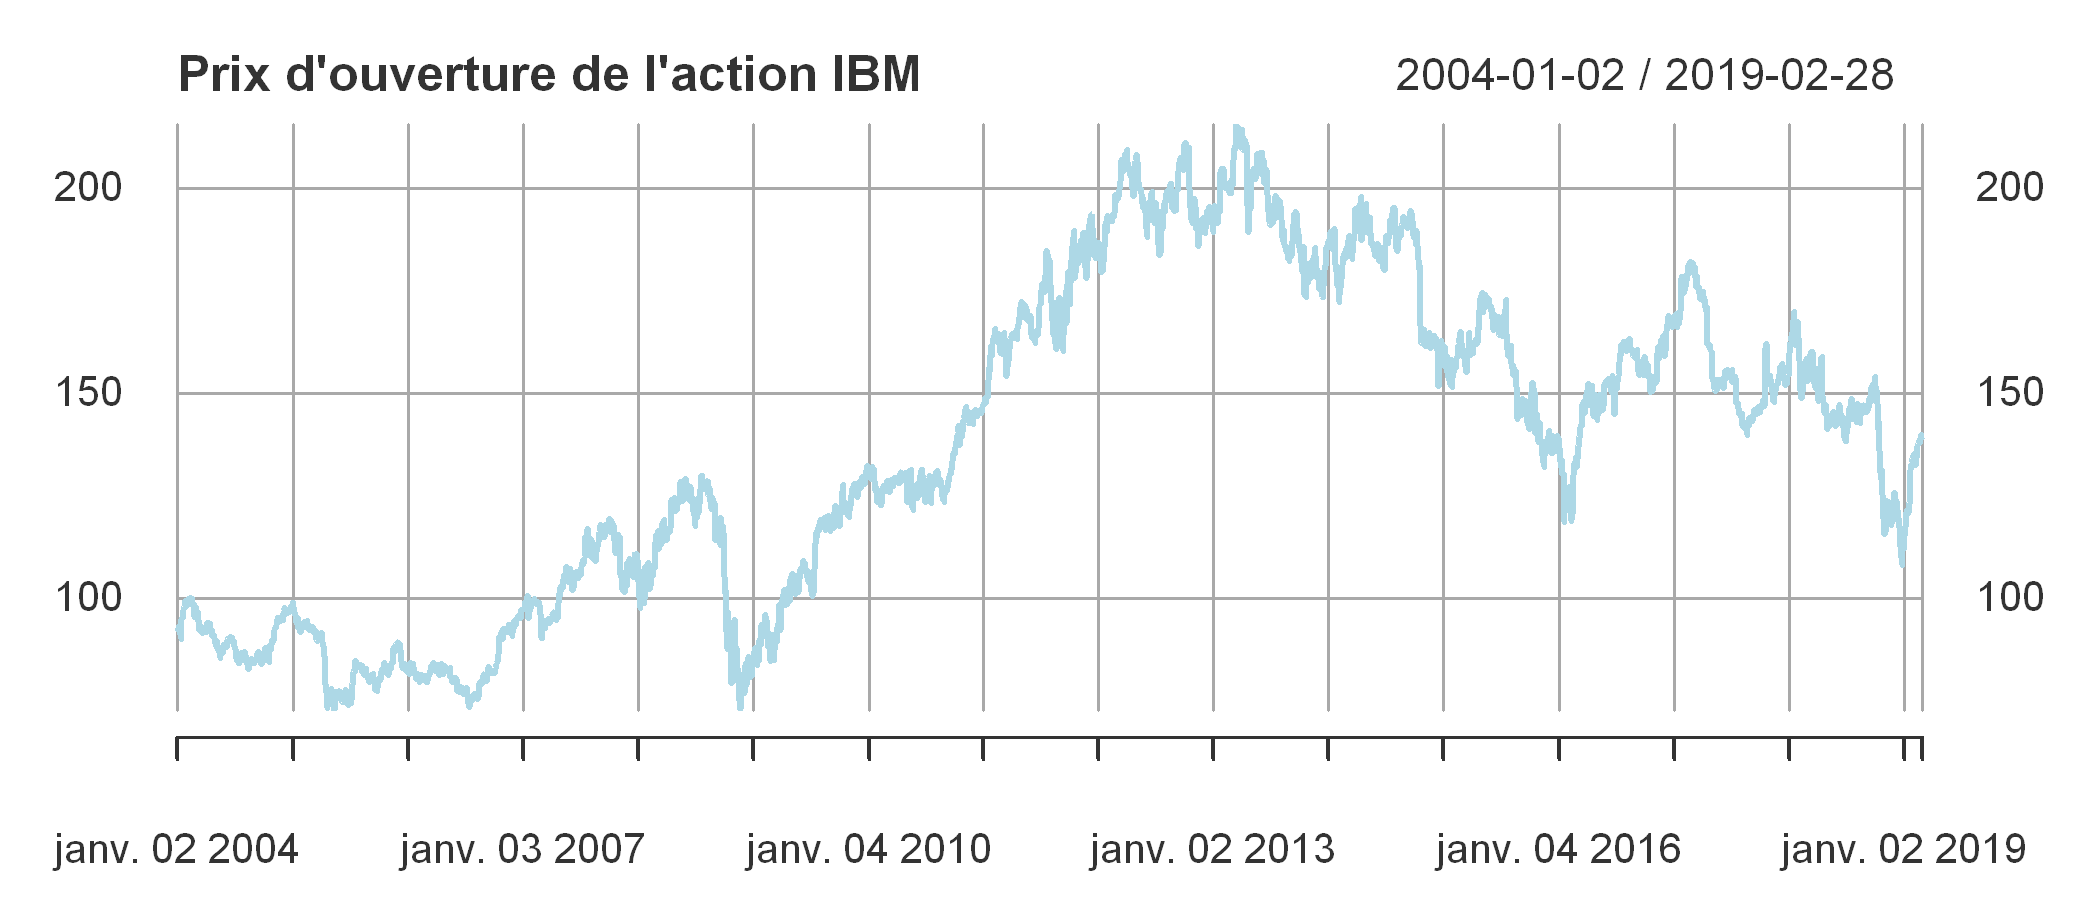

In [7]:
plot(IBM[, "IBM.Open"], main = "Prix d'ouverture de l'action IBM", col = "lightblue")

On a pris l'avantage des classes `xts` et `zoo` pour facilement visualiser cette série temporelle avec la fonction générique `plot()`.  
Sur la période considérée on observe une nette augmentation du prix d'ouverture de l'action IBM. Ce prix est à son plus bas niveau entre 2008 et 2009, on peut tout de suite voir que la crise des subrpimes a quelque chose à y voir. Les prix des actions sont très volatiles car ils dépendent TOTALEMENT du comportement des acteurs qui interviennent sur le marché financier.

On peut également représenter toutes les prix sur un même graphique pour voir comment ils évoluent. Y a-t-il des différences entre les prix d'ouverture, de fermeture...  

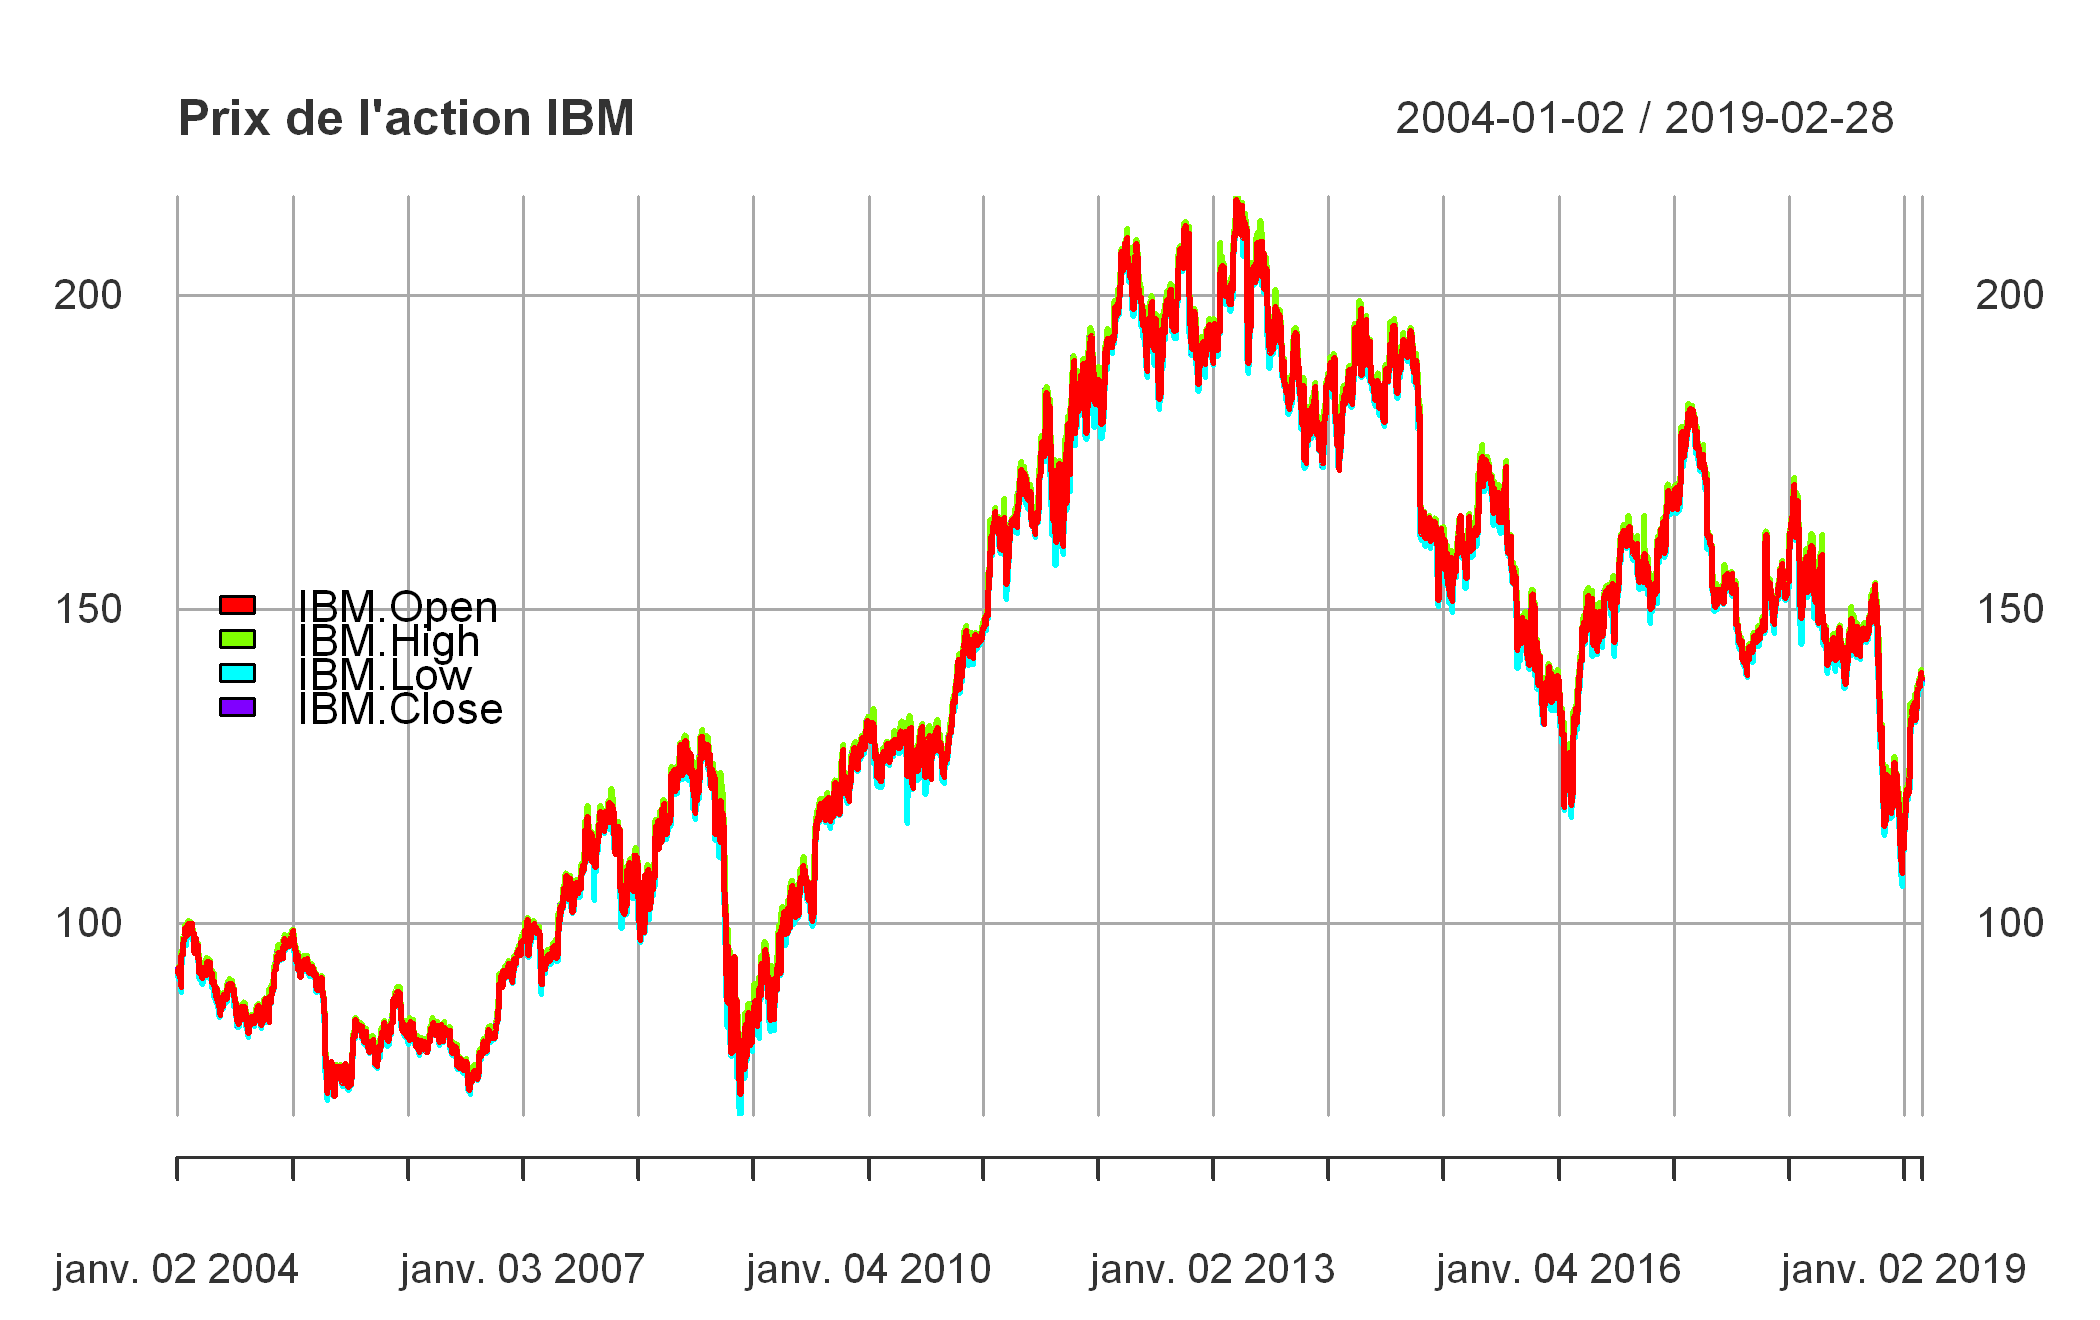

In [101]:
options(repr.plot.res = 300, repr.plot.height = 4.4) # paramètres graphiques, res pour résolution
plot.xts(IBM[,1:4],legend.loc = "left", main = "Prix de l'action IBM", col = rainbow(4))

La plupart du temps ces valeurs se superposent, et la tendance générale est la même pour tous les différents prix.Il y a toutefois une nette différence entre les prix haut et bas. Regardons les dans les détails

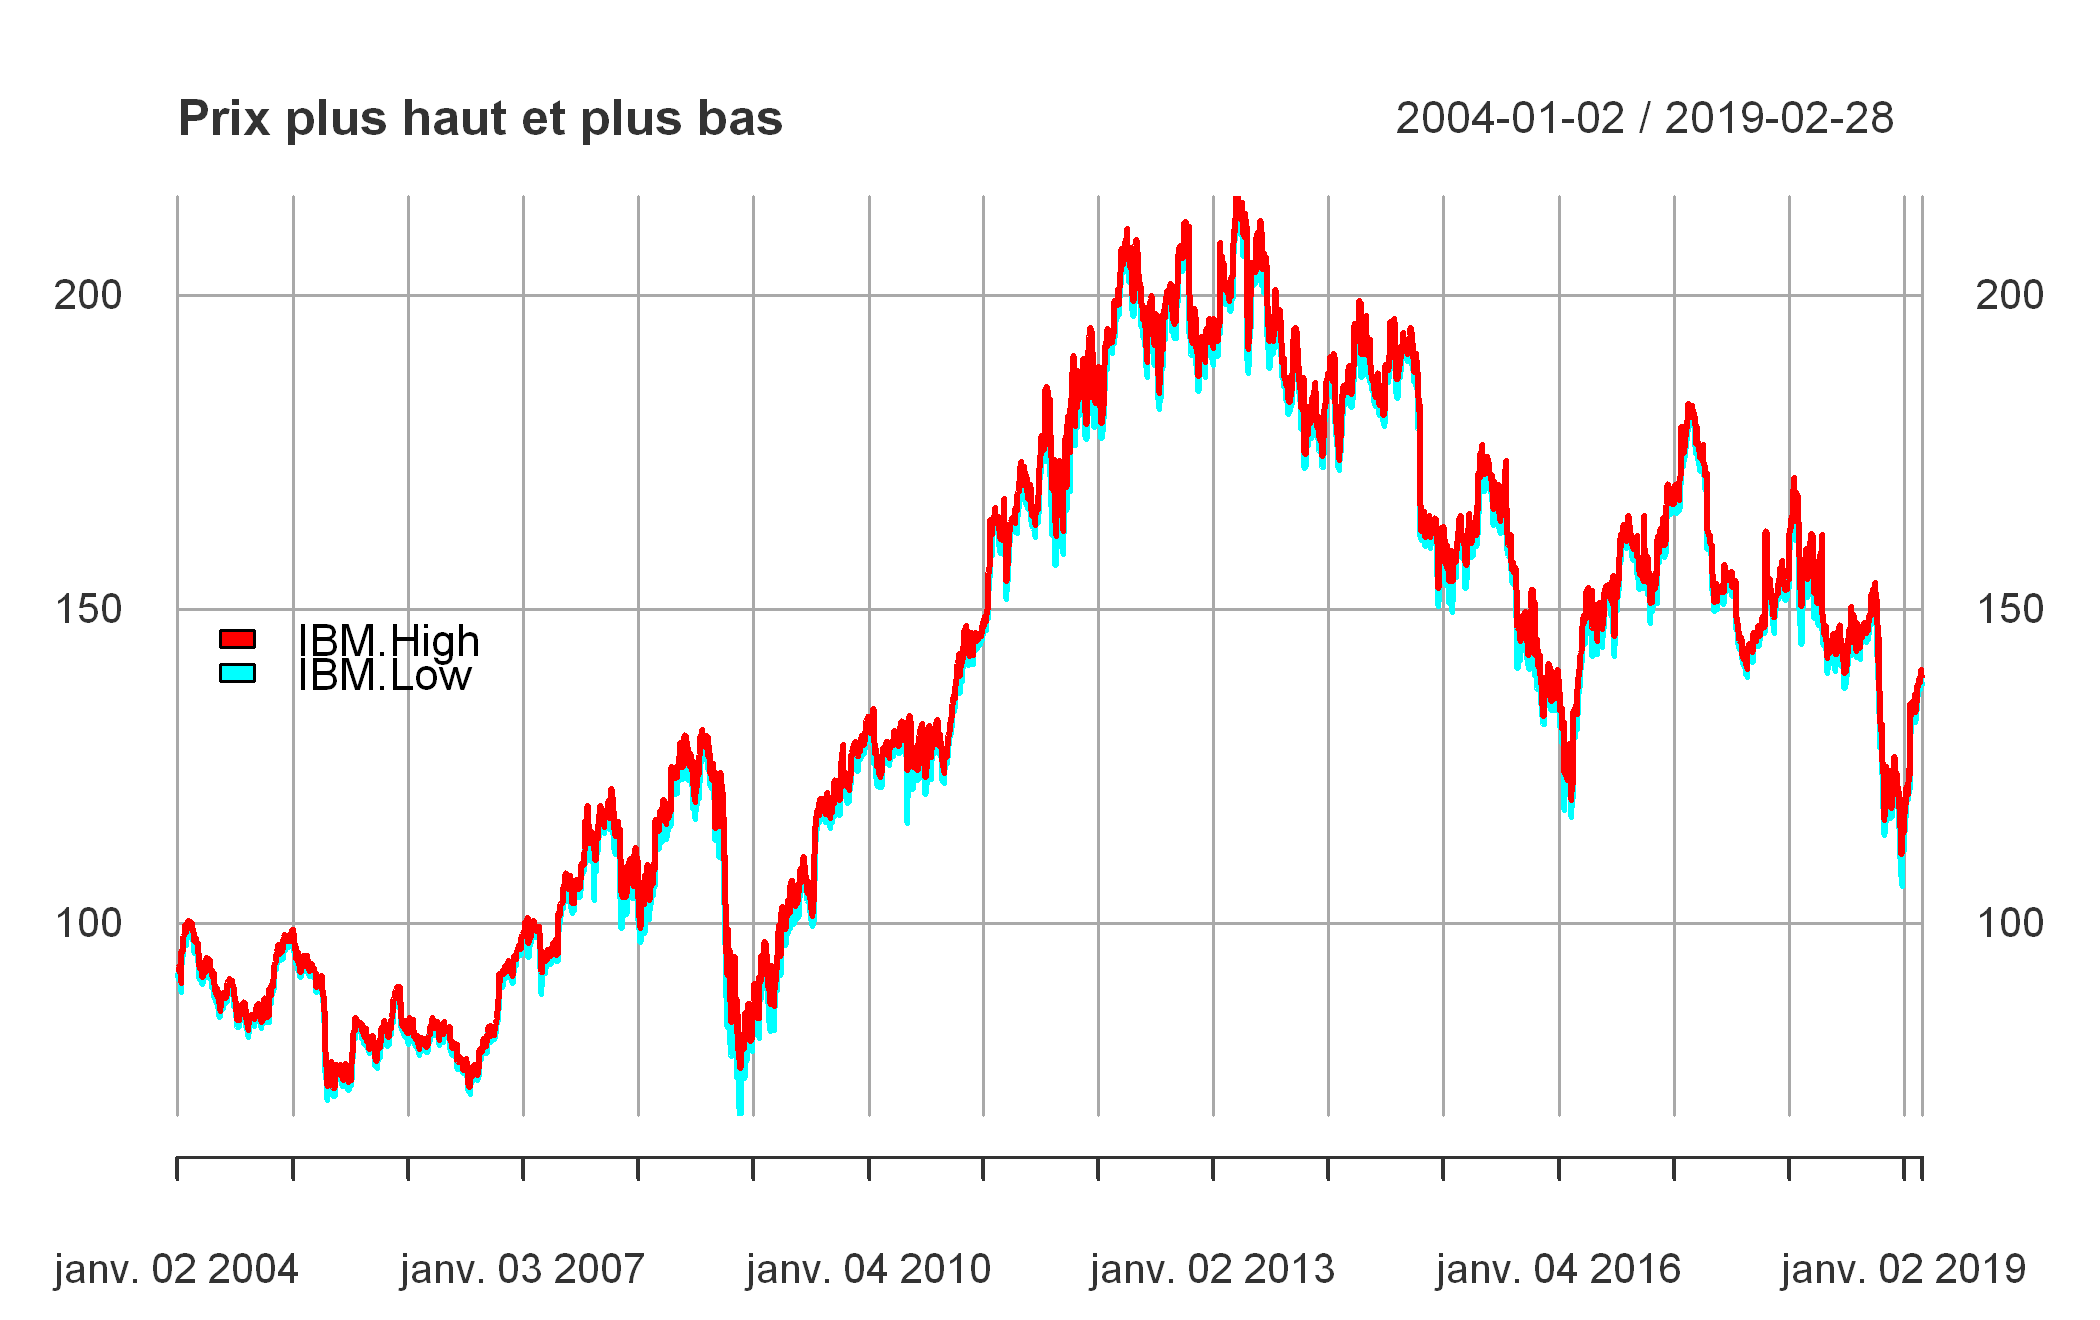

In [107]:
options(repr.plot.res = 300, repr.plot.height = 4.4) # paramètres graphiques, res pour résolution
plot.xts(IBM[,2:3],legend.loc = "left", main = "Prix plus haut et plus bas", col = rainbow(n= 2))

Intéressons-nous maintenant au volume

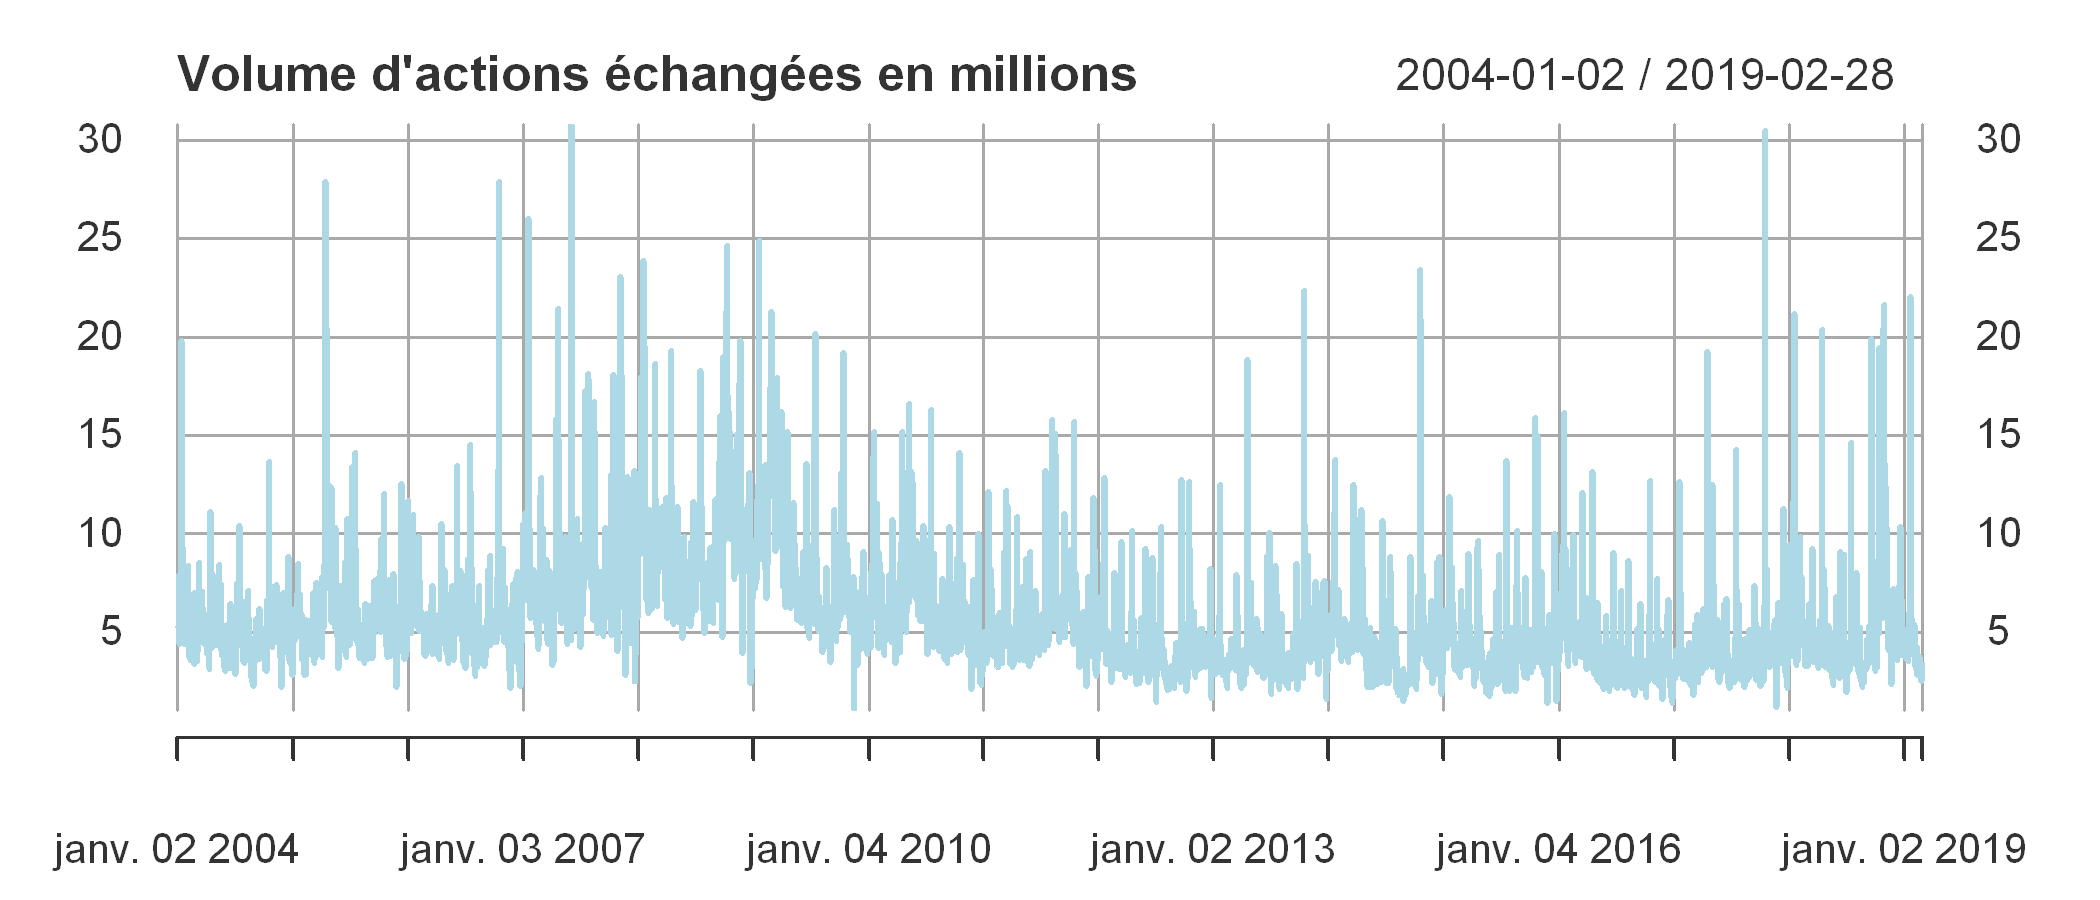

In [9]:
plot(IBM[, "IBM.Volume"]/1000000, col = "lightblue", main = "Volume d'actions échangées en millions")

Les volumes échangés fluctuent les plus. Il n'y a pas une tendance à la hausse comme on a pu l'observer pour les prix. Le volume échangé est plus aléatoire.  
La librairie `quantmod` a une série de fonctions pour représenter les visuellement les graphiques dont `candleChart`.

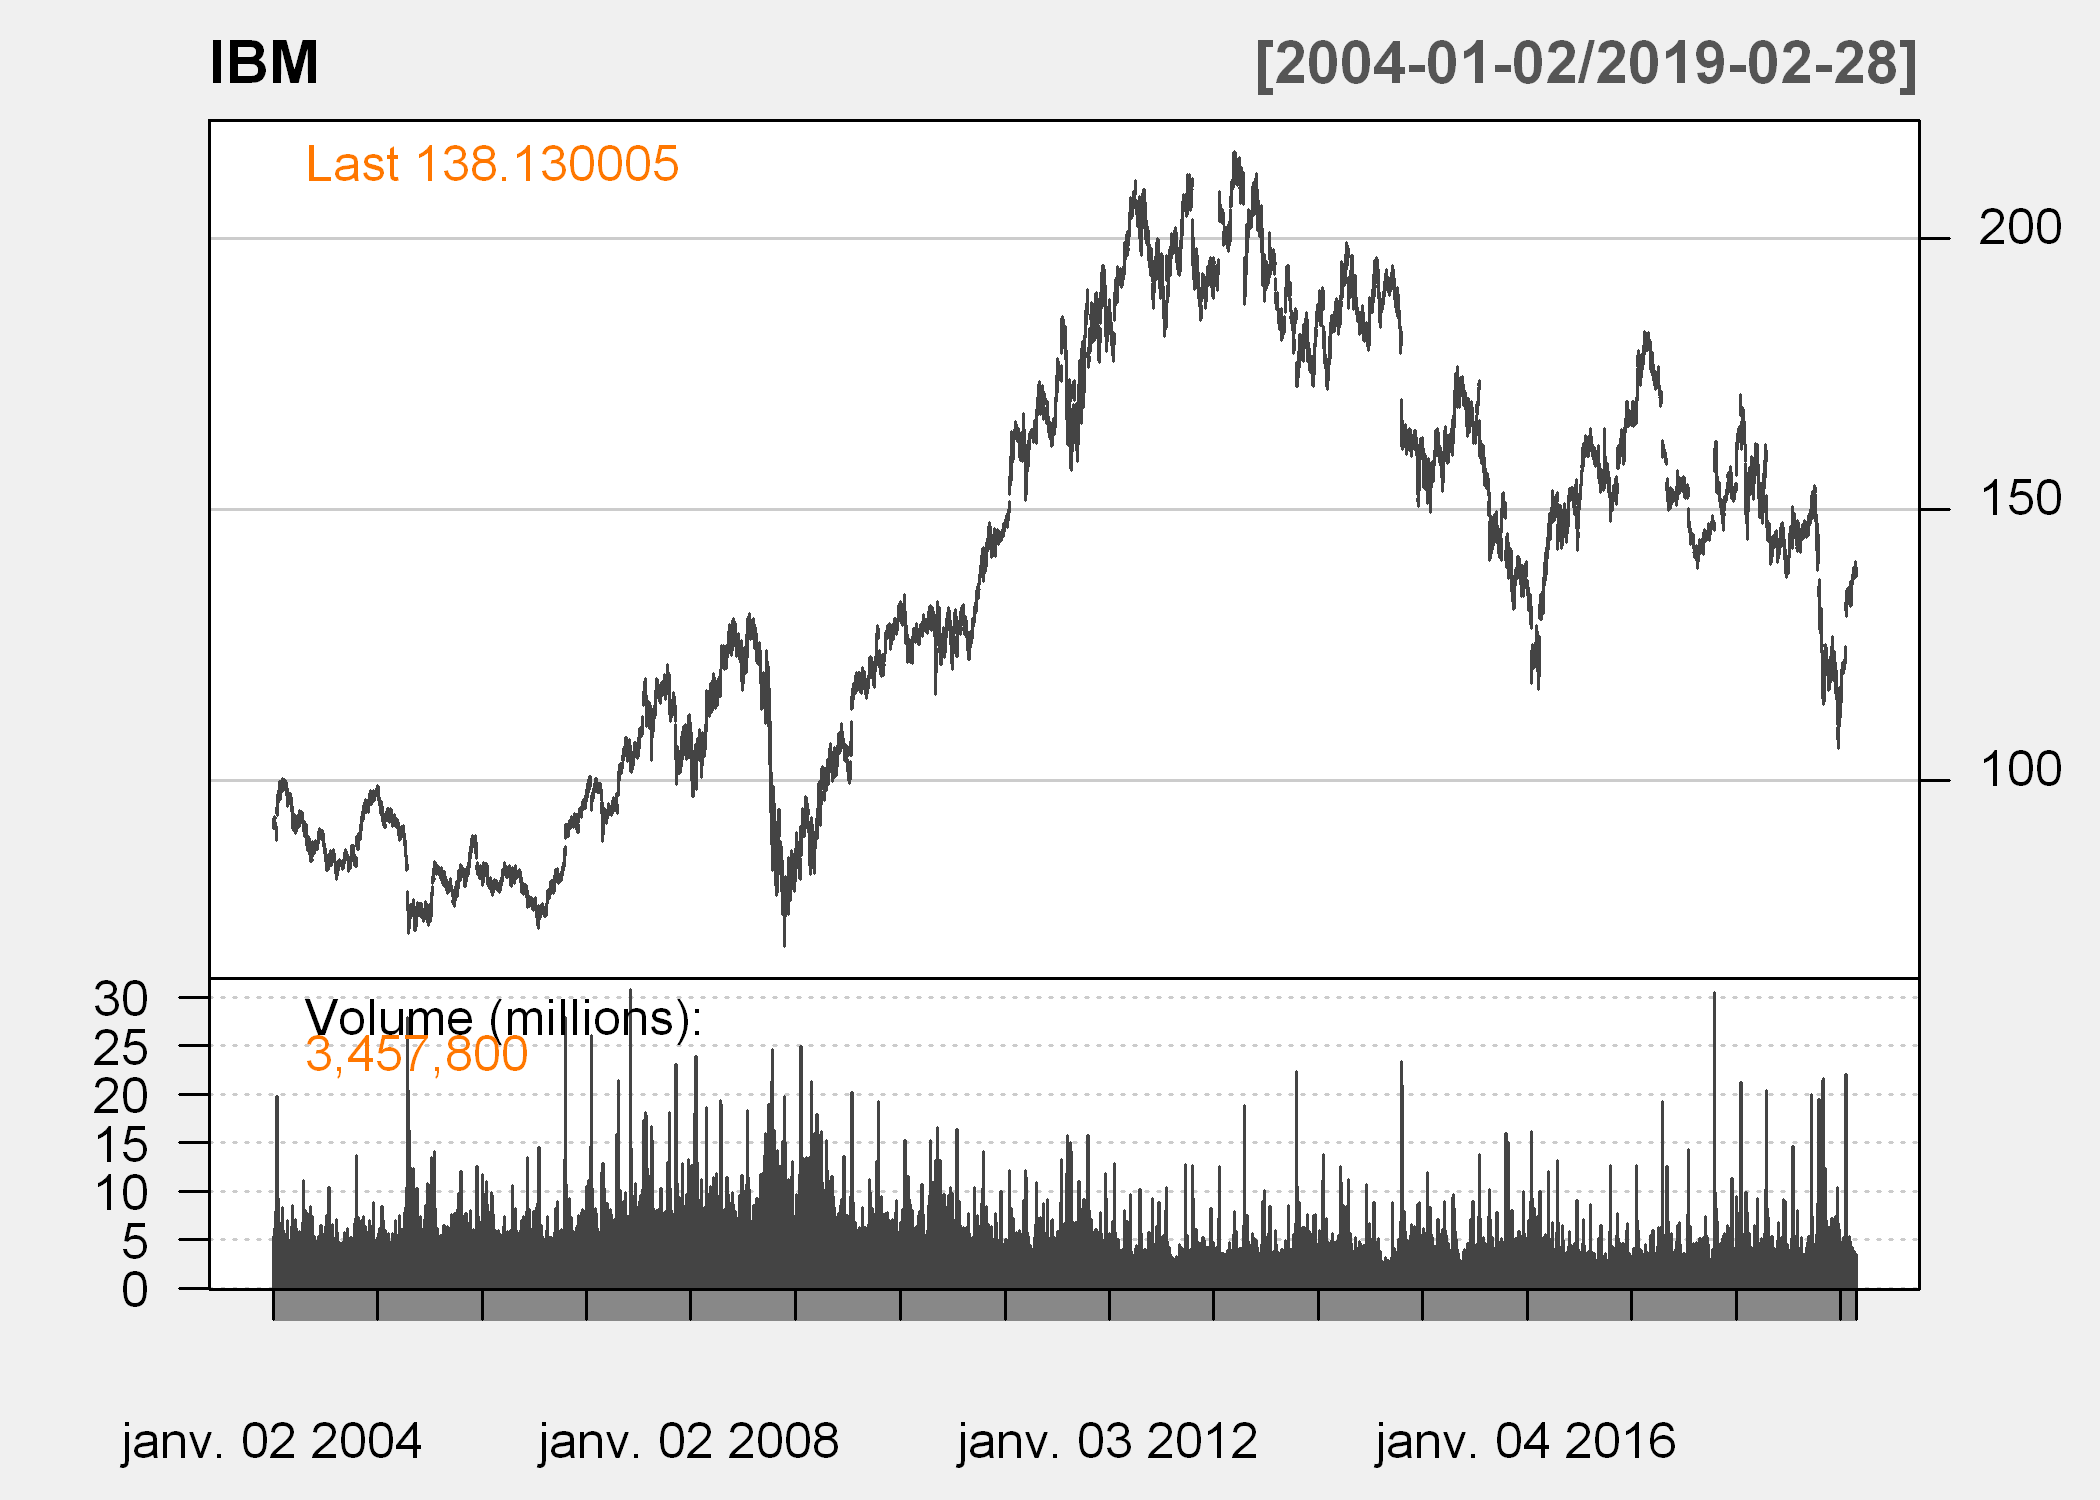

In [10]:
options(repr.plot.res = 300, repr.plot.height = 5) # paramètres graphiques, res pour résolution
candleChart(IBM, type = "line", theme = "white", show.grid = T)

# Modélisations

Il existe de nombreux packages pour faire la modélisation GARCH avec R. Ne sachant pas moi-même le meilleur à prendre, je me suis inspiré de la vidéo de Ralph Becker que vous pouvez [regarder ici](https://www.youtube.com/embed/8VXmRl5gzEU).  
On fera la modélisation avec les packages `rugarch` et `rmgarch` respectivement pour Univariate GARCH et Multivariate GARCH. 

In [ ]:
# Installons les packages
#install.packages(c("rugarch", "rmgarch"))

In [ ]:
library(rugarch)
library(rmgarch)

Les documentations concernant ces deux packages se trouvent sur les sites suivants : [rugarch](https://cran.r-project.org/web/packages/rugarch/rugarch.pdf) et [rmgarch](https://cran.r-project.org/web/packages/rmgarch/rmgarch.pdf). La syntaxe de ces packages diffère un peu des autres fonctions R. 

## GARCH Univarié
Nous n'allons utiliser que le GARCH univarié car nous n'avons pas d'exogènes à proprement parler à inclure dans le modèle. Pour un GARCH multivarié il faudra lire les données de plusieurs entreprises en même temps

In [17]:
univ_garch = ugarchspec() # On commence par instancier l'objet ugarch sans y ajouter de paramètres

In [18]:
univ_garch


*---------------------------------*
*       GARCH Model Spec          *
*---------------------------------*

Conditional Variance Dynamics 	
------------------------------------
GARCH Model		: sGARCH(1,1)
Variance Targeting	: FALSE 

Conditional Mean Dynamics
------------------------------------
Mean Model		: ARFIMA(1,0,1)
Include Mean		: TRUE 
GARCH-in-Mean		: FALSE 

Conditional Distribution
------------------------------------
Distribution	:  norm 
Includes Skew	:  FALSE 
Includes Shape	:  FALSE 
Includes Lambda	:  FALSE 


Ce sont les configurations par défaut. sGARCH signifie standard GARCH c'est le GARCH simple car il existe une grande variété de modèles GARCH. Faisons une première estimation avec ces spécifications.

In [19]:
mod <- ugarchfit(spec = univ_garch, data = IBM[, "IBM.Open"])

On peut afficher les résultats directement en exécutant l'objet mod mais les résultats sont très nombreux et risquent de prendre de la place sur l'écran. Donc nous n'allons sélectionner que ce qui nous intéresse dans un modèle GARCH, c'est-à-dire la variance conditionnelle $ \sigma^2 $


L'objet mod qu'on a créé contient de familles de résultats: les résultats du modèle et les résultats d'estimation. Pour accéder à l'un ou l'autre de ces résultats on utilise @ après mod.

In [28]:
# affichons les noms des informations contenues dans ces deux objets
print("Objets contenus dans model@fit")
names(mod@fit)
print("Objets contenus dans model@model")
names(mod@model)

[1] "Objets contenus dans model@fit"


[1] "hessian"         "cvar"            "var"             "sigma"          
 [5] "condH"           "z"               "LLH"             "log.likelihoods"
 [9] "residuals"       "coef"            "robust.cvar"     "A"              
[13] "B"               "scores"          "se.coef"         "tval"           
[17] "matcoef"         "robust.se.coef"  "robust.tval"     "robust.matcoef" 
[21] "fitted.values"   "convergence"     "kappa"           "persistence"    
[25] "timer"           "ipars"           "solver"

[1] "Objets contenus dans model@model"


[1] "modelinc"   "modeldesc"  "modeldata"  "pars"       "start.pars"
 [6] "fixed.pars" "maxOrder"   "pos.matrix" "fmodel"     "pidx"      
[11] "n.start"

In [32]:
# Regardons les coefficients d'estimation
mod@fit$matcoef

,Estimate,Std. Error,t value,Pr(>|t|)
mu,92.871630280,1.375150510,67.535611,0.000000e+00
ar1,0.999745478,0.000533952,1872.351017,0.000000e+00
ma1,-0.024373350,0.016509271,-1.476343,1.398518e-01
omega,0.007360053,0.001237242,5.948758,2.701844e-09
alpha1,0.024024398,0.001488674,16.138116,0.000000e+00
beta1,0.974604561,0.002044855,476.612995,0.000000e+00


Nous avons dans ce tableau se trouvent les informations de l'estimation. Dans la spécification du modèle nous avons choisi un modèle GARCH simple garch(p=1,q=1) c'est ce que représentent les $\alpha_1$ et $\beta_1$ dont on a les valeurs.  
On peut présenter ce modèle comme cela : $$ \mu + AR1 + MA1 + \omega + \alpha_1 + \beta_1$$

## Variance conditionnelle estimée

Nous allons créer un data frame dans lesquel nous sauvons ces résultats pour les visualiser

In [72]:
variance <- xts(mod@fit$var, order.by = as.Date(index(IBM)))
names(variance) <- "variance"
head(variance)

           variance
2004-01-02 2.982531
2004-01-05 2.914152
2004-01-06 2.865286
2004-01-07 2.800649
2004-01-08 2.758303
2004-01-09 2.695823

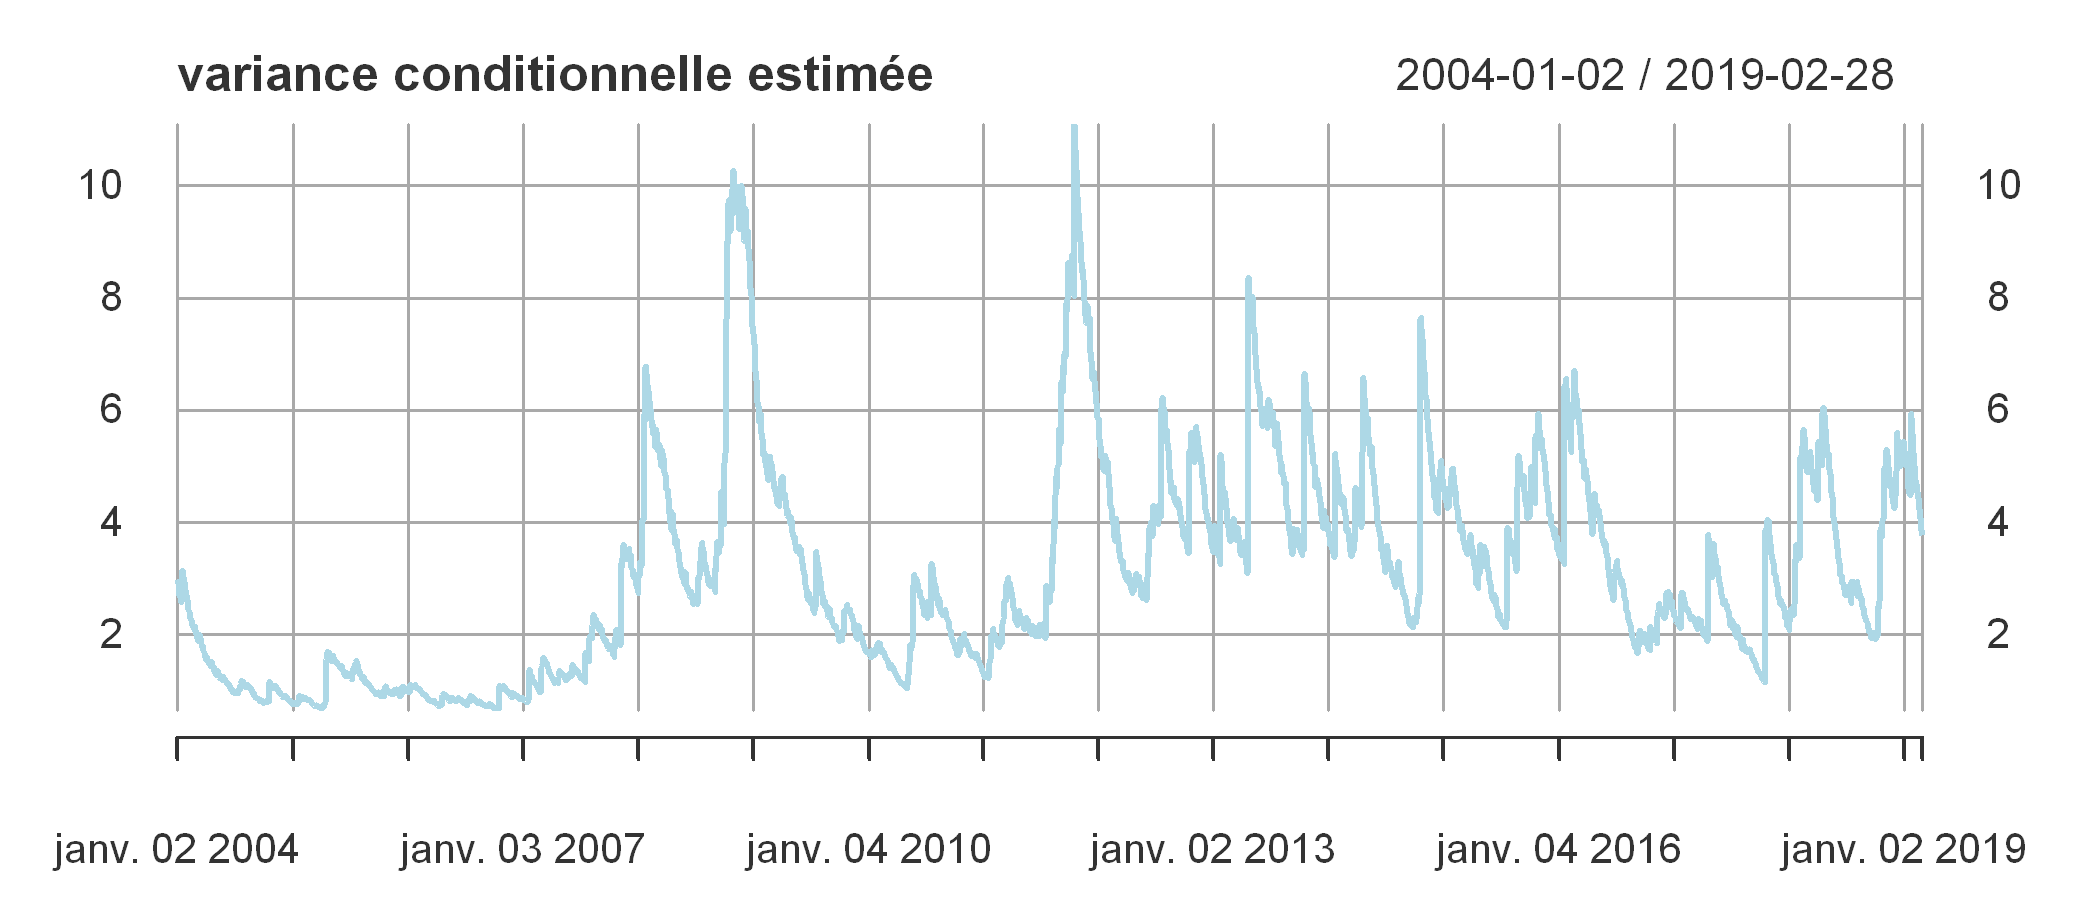

In [73]:
plot(variance, main = "variance conditionnelle estimée", col = "lightblue")

## Prévisions sur le passé
Nous allons comparer les performances de notre modèle à prédire les valeurs du passé. Nous construirons un graphique sur lequel les deux séries se superposent pour observer les différences

In [80]:
prev <- cbind(c(IBM[, "IBM.Open"]), mod@fit$fitted.values)
names(prev) <- c("valeur.observee", "valeur.predite")
head(prev)

           valeur.observee valeur.predite
2004-01-02           92.86       92.87163
2004-01-05           92.00       92.86029
2004-01-06           92.20       92.02119
2004-01-07           93.14       92.19581
2004-01-08           93.21       93.11692
2004-01-09           91.75       93.20764

In [82]:
help(plot.xts)

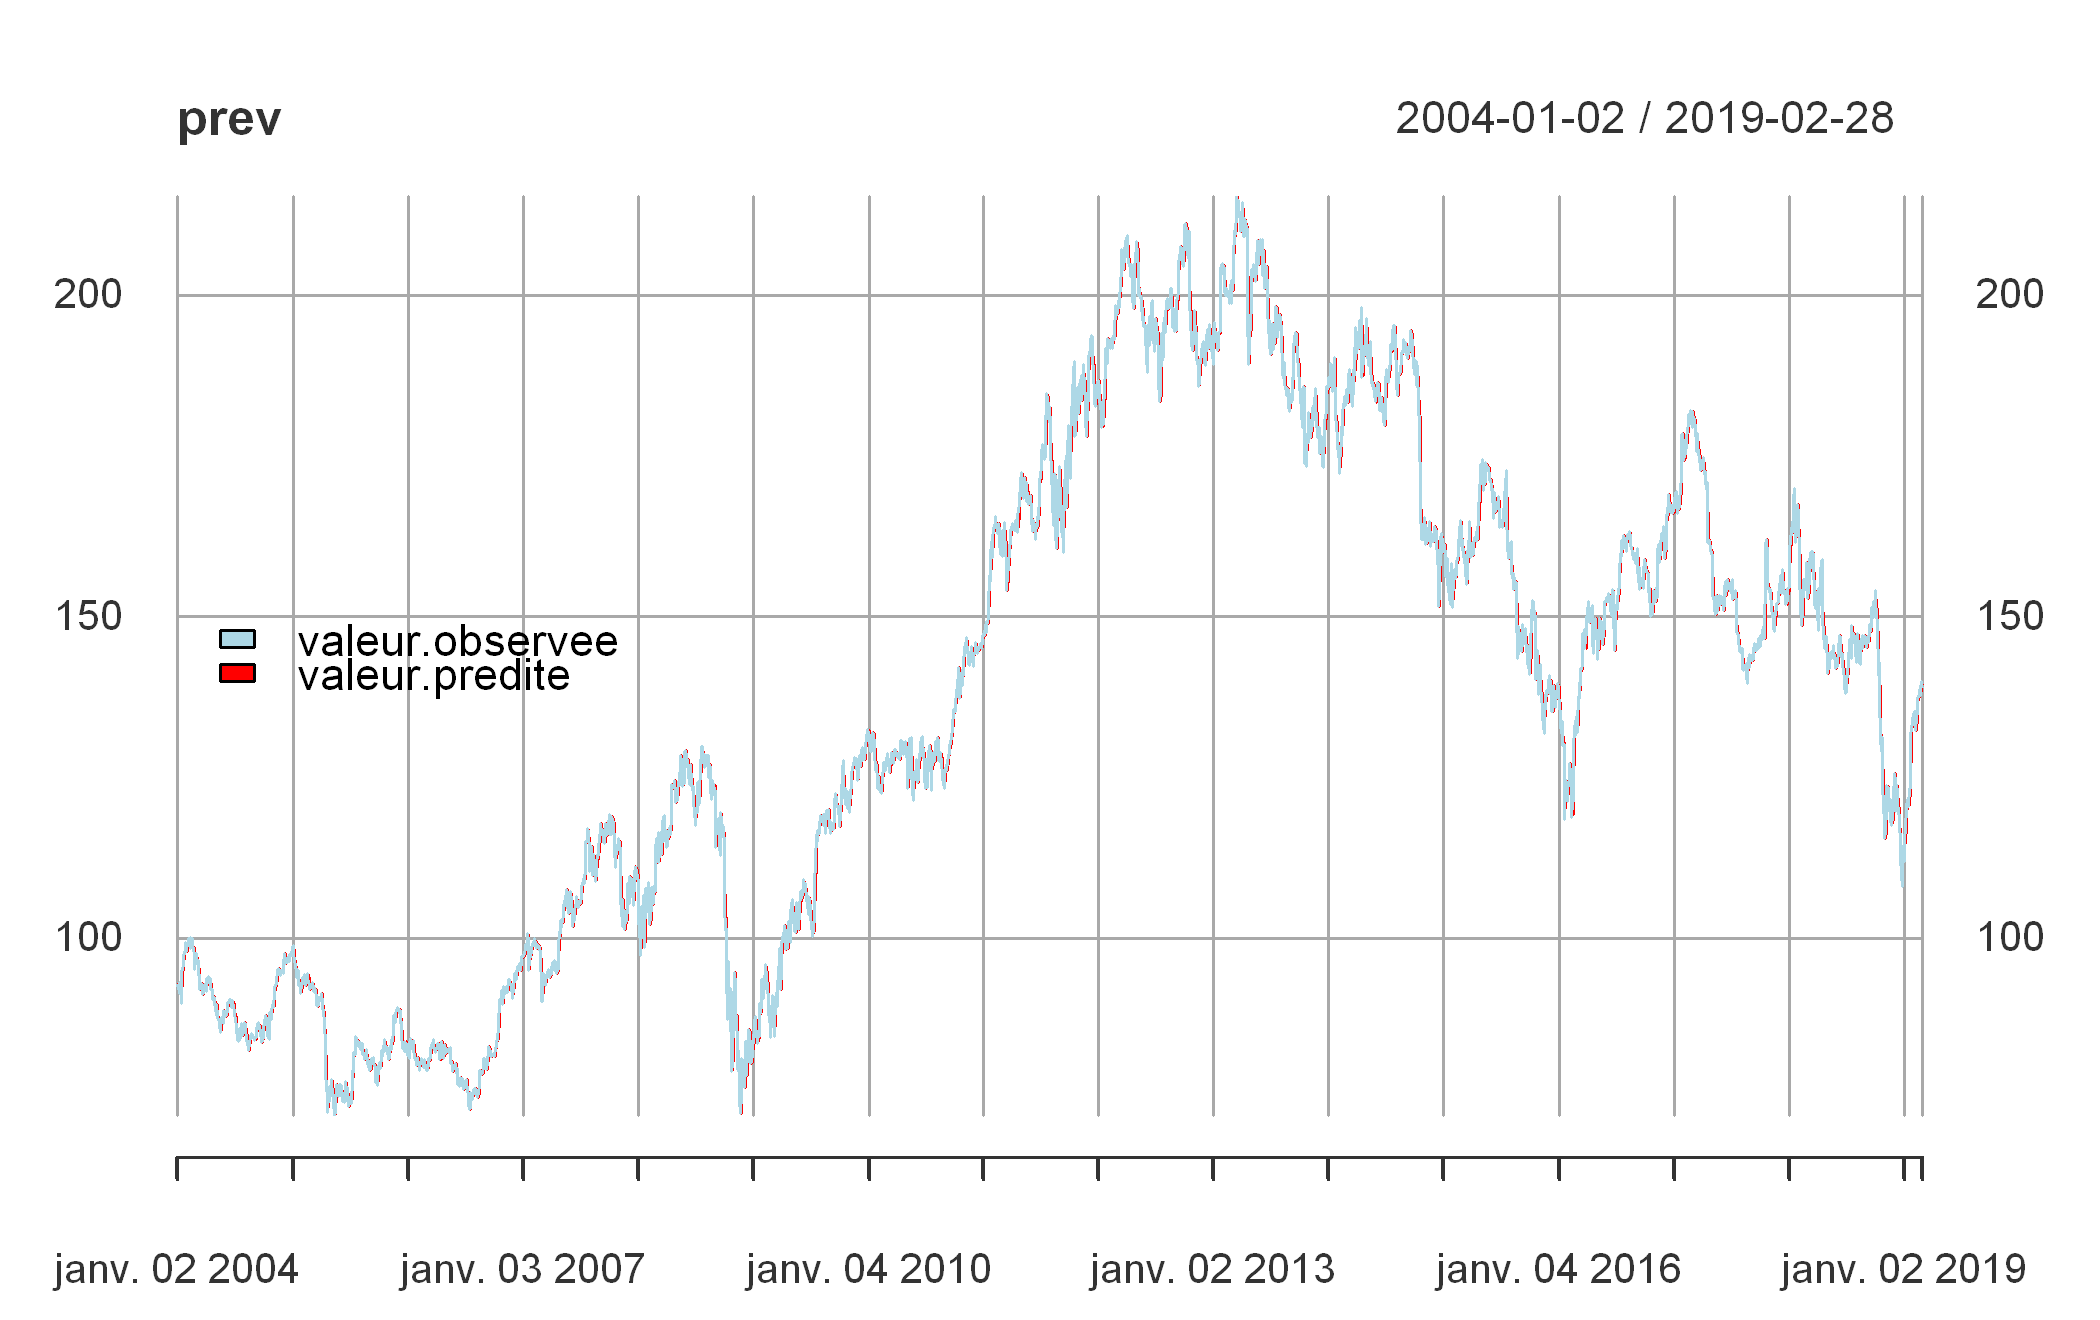

In [109]:
plot.xts(prev, col = c("lightblue", "red"), legend.loc= "left", lwd = 1)

La performance globale du modèle est très bonne pour la prévision dans le passé. Les modèles GARCH sont généralement très bons lorsque la période considérée est relativement courte.

Pour avoir une idée plus claire de cette différence, nous pouvons représenter graphiquement les résidus et le carré de ces résidus.

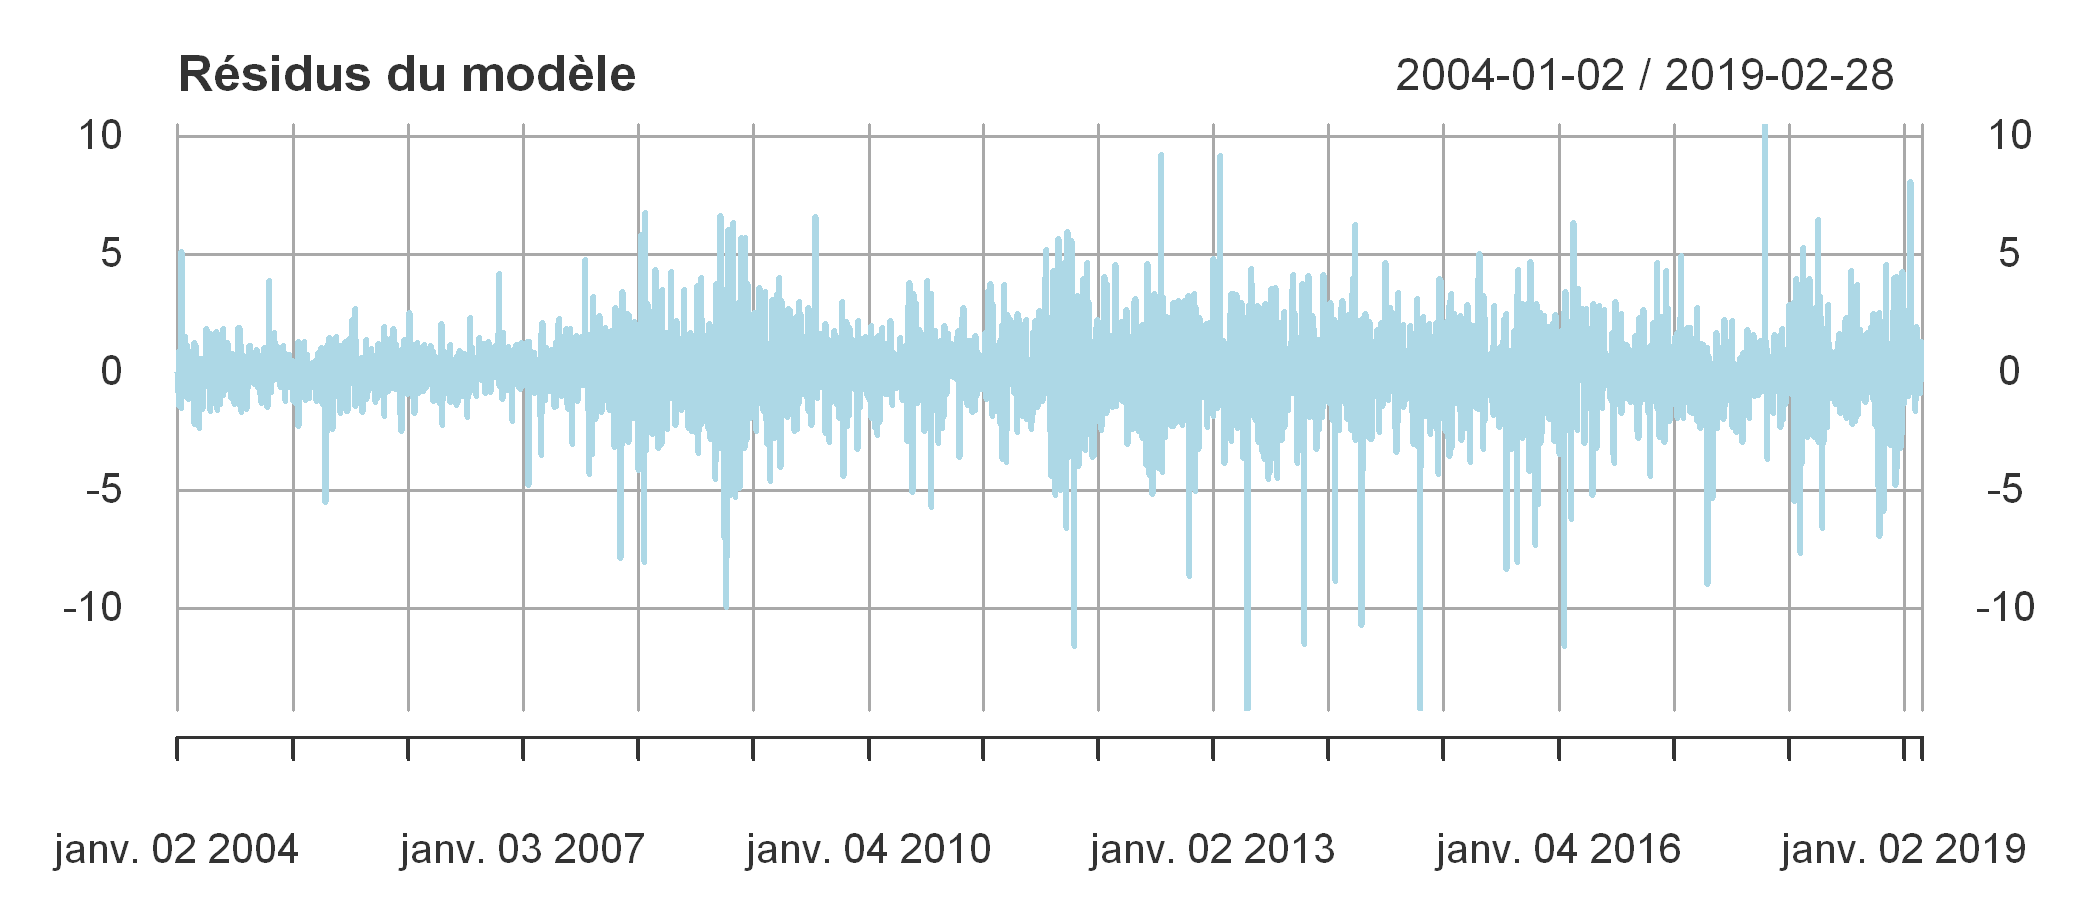

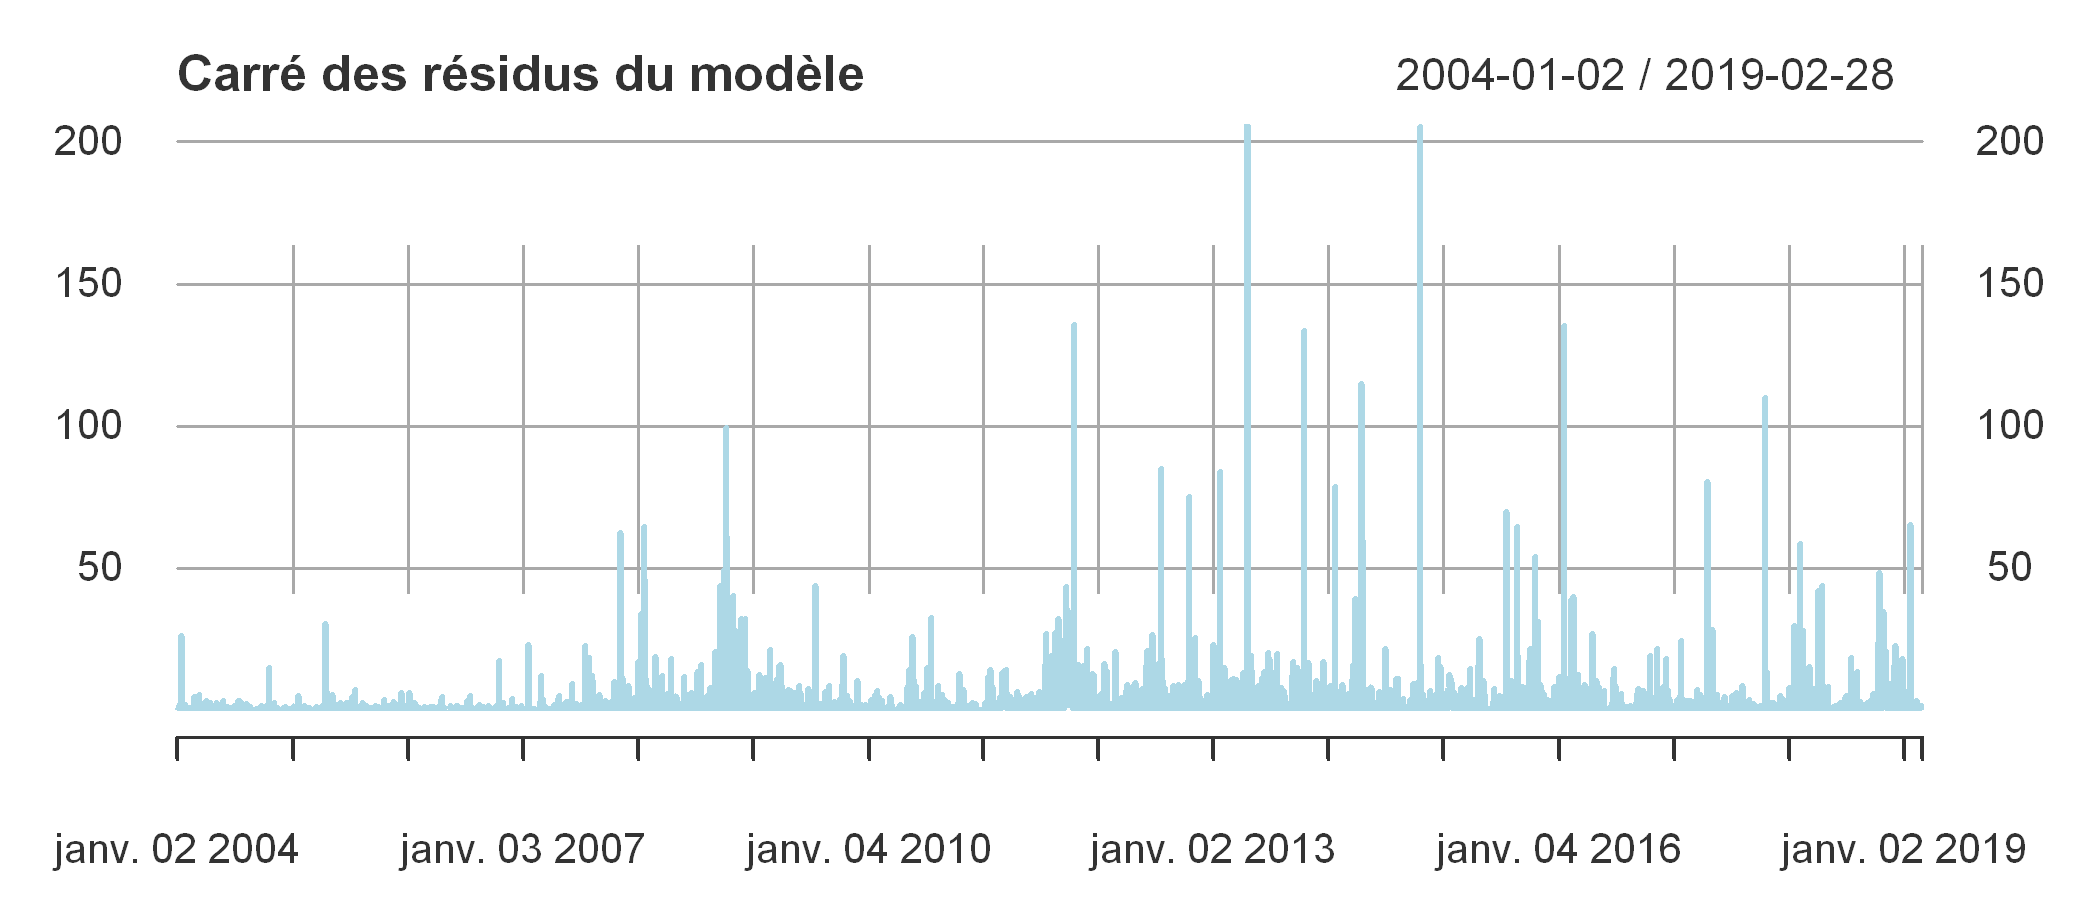

In [122]:
options(repr.plot.res = 300, repr.plot.height = 3) # paramètres graphiques, res pour résolution
resid <- xts(mod@fit$residuals, order.by = as.Date(index(IBM)))
plot.xts(resid, main = "Résidus du modèle", col = "lightblue")
resid2 <- xts(mod@fit$residuals^2, order.by = as.Date(index(IBM)))
plot.xts(resid2, main = "Carré des résidus du modèle", col = "lightblue")

## Les rendements

Le calcul du rendement est simple, c'est la variation du prix de fermeture de l'action sur la période considérée. la formule est la suivante: $$ R = \frac {prix_t - prix_{t-1}} {prix_{t-1}}$$ Généralement on calcule le rendement journalier. `quantmod`intègre une série de fonctions qui nous permettent de calculer les rendements dont dailyReturn qui calcule le rendement journalier.

In [11]:
rIBM <- dailyReturn(IBM)
head(rIBM)

           daily.returns
2004-01-02 -0.0141072365
2004-01-05  0.0163844888
2004-01-06  0.0001074154
2004-01-07 -0.0030088008
2004-01-08  0.0028023497
2004-01-09 -0.0196689809

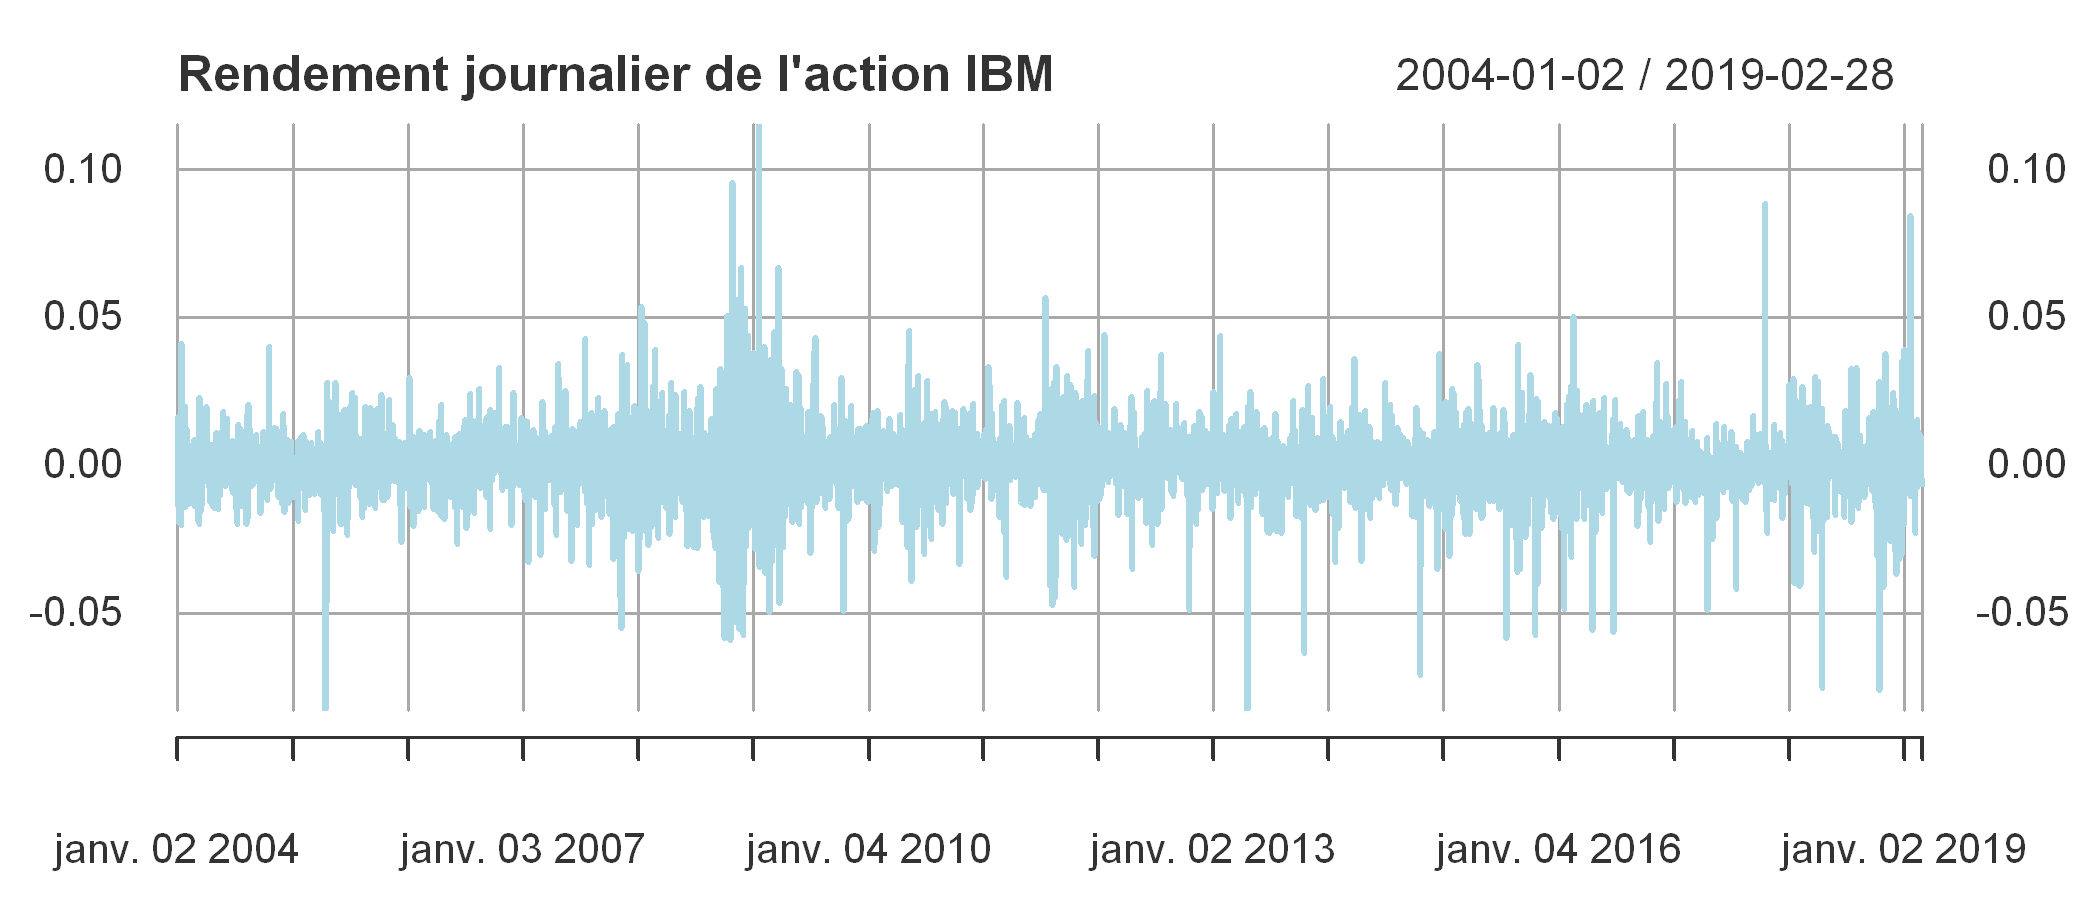

In [13]:
options(repr.plot.res = 300, repr.plot.height = 3) # paramètres graphiques, res pour résolution
plot(rIBM, main = "Rendement journalier de l'action IBM", col = "lightblue")

# Modélisation du rendement

Pour le rendement, je choisis les spécifications suivantes: j'utilise un "eGARCH", ce choix est juste aléatoire, couplé avec un retard d'ordre 3 et d'une moyenne mobile 3 aussi. La moyenne est une moyenne ARCH-in-mean.

In [152]:
return_garch <- ugarchspec(variance.model = list(model = "eGARCH", garchOrder = c(3,3)), 
                           mean.model = list(archm = 3))

In [153]:
fit_return <- ugarchfit(spec = return_garch, data = rIBM)

## Résultats

In [154]:
fit_return@fit$matcoef

,Estimate,Std. Error,t value,Pr(>|t|)
mu,0.0003373178,0.0002535284,1.3304929,1.833559e-01
ar1,-0.2801495873,0.0209793094,-13.3536134,0.000000e+00
ma1,0.2575985543,0.0213733469,12.0523265,0.000000e+00
archm,-0.0056631658,0.0277292577,-0.2042307,8.381732e-01
omega,-0.9573623475,0.1969173808,-4.8617463,1.163547e-06
alpha1,-0.0599571073,0.0196478443,-3.0515870,2.276350e-03
alpha2,-0.0876103632,0.0200375304,-4.3723134,1.229369e-05
alpha3,0.0109273856,0.0209578236,0.5213989,6.020889e-01
beta1,0.1315229696,0.0920725229,1.4284714,1.531562e-01
beta2,0.2711635420,0.0662792739,4.0912268,4.290972e-05


## Variance conditionnelle

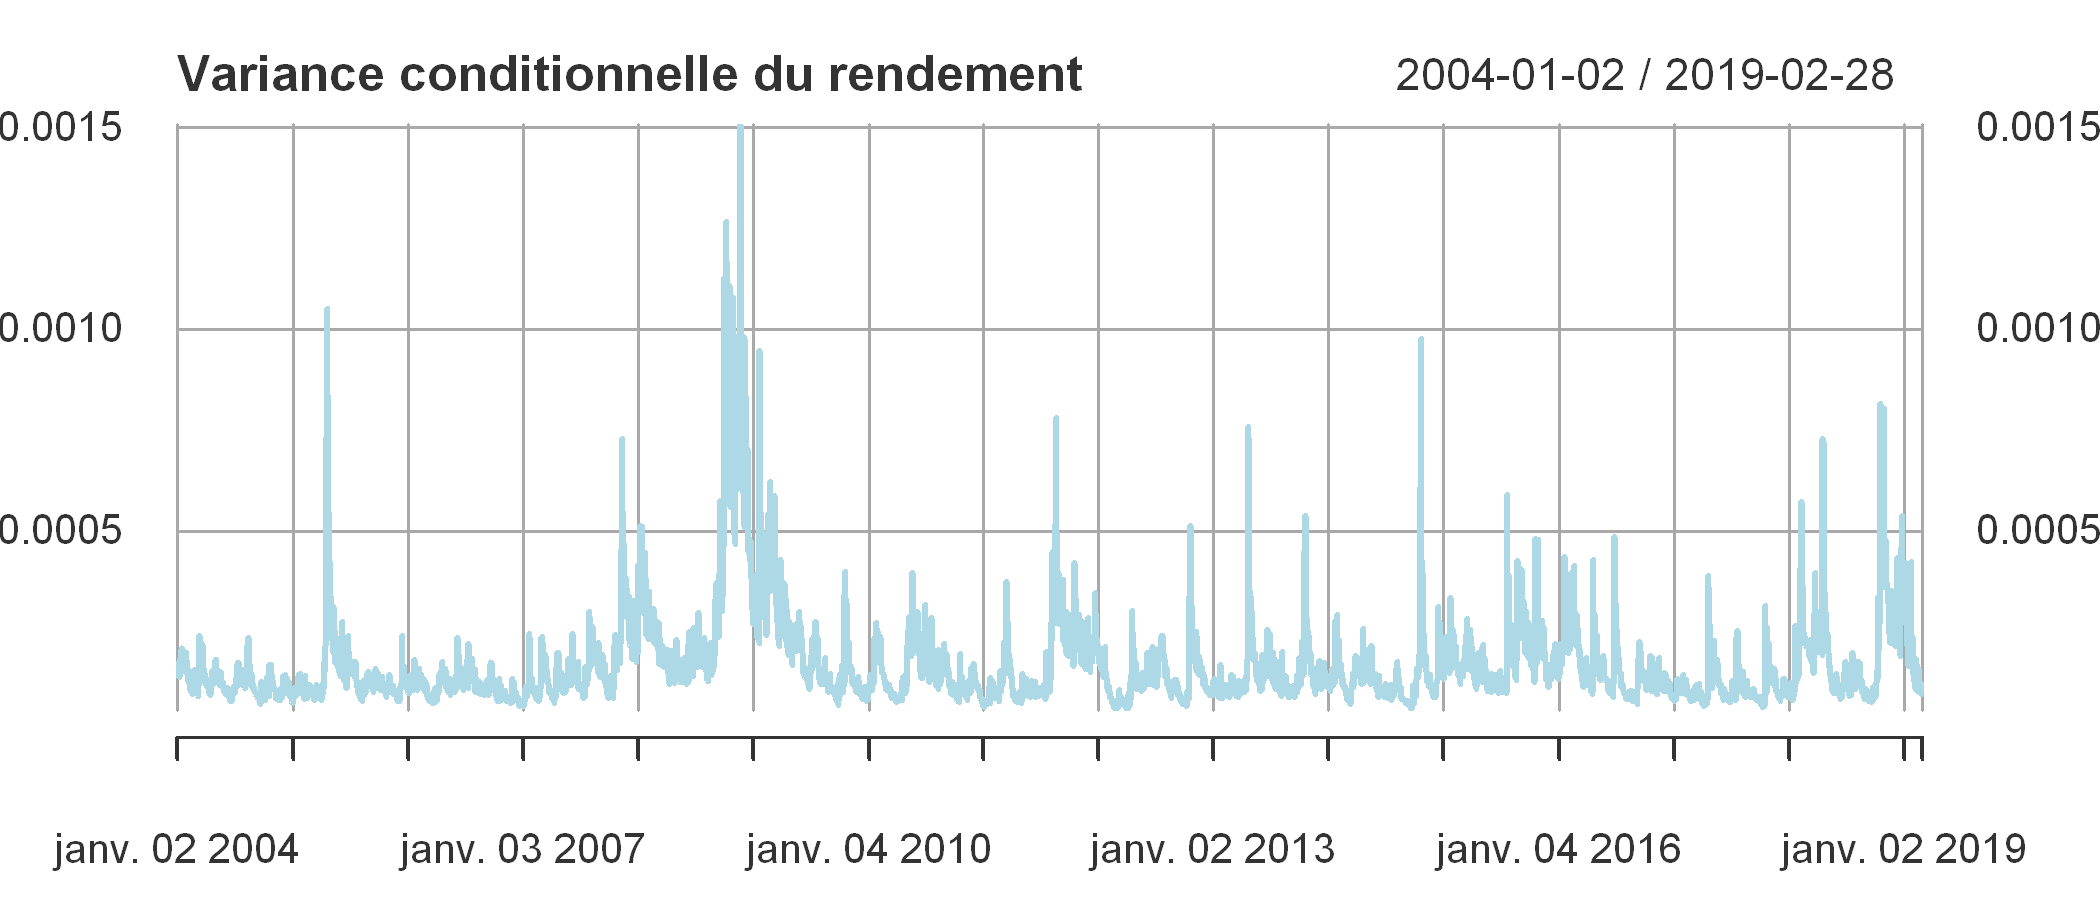

In [156]:
return_var <- xts(fit_return@fit$var, order.by = as.Date(index(rIBM)))
plot(return_var, main = "Variance conditionnelle du rendement", col = "lightblue")

# Prévision sur le futur

Nous pouvons faire une prévision des prix futurs avec la fonction `ugarchforecast`

In [142]:
ugarchforecast(fitORspec = mod, n.ahead = 10)


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 10
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=2019-02-28]:
     Series Sigma
T+1   138.8 1.919
T+2   138.8 1.920
T+3   138.7 1.921
T+4   138.7 1.921
T+5   138.7 1.922
T+6   138.7 1.922
T+7   138.7 1.923
T+8   138.7 1.924
T+9   138.7 1.924
T+10  138.7 1.925



In [143]:
mean(IBM[, "IBM.Open"])

[1] 137.5574

Nous venons de faire une prévision sur 10 jours futurs.